In [13]:
import pandas as pd
import datetime as dt

## Add bigboy table to combined

In [7]:
tweets = pd.read_csv("/Users/kelseyesposito/finBERT/data/sentiment_data/Tweet.csv")
companies = pd.read_csv("/Users/kelseyesposito/finBERT/data/sentiment_data/Company_Tweet.csv")

In [10]:
# format the tweets
tweets_cleaned = tweets
tweets_cleaned = tweets_cleaned[["tweet_id", "post_date", "body"]]
tweets_cleaned.head()

,tweet_id,post_date,body
0,550441509175443456,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt..."
1,550441672312512512,1420070496,Insanity of today weirdo massive selling. $aap...
2,550441732014223360,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...
3,550442977802207232,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...
4,550443807834402816,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...


0         1970-01-01 00:00:01.420070457
1         1970-01-01 00:00:01.420070496
2         1970-01-01 00:00:01.420070510
3         1970-01-01 00:00:01.420070807
4         1970-01-01 00:00:01.420071005
                       ...             
3717959   1970-01-01 00:00:01.577836383
3717960   1970-01-01 00:00:01.577836401
3717961   1970-01-01 00:00:01.577836443
3717962   1970-01-01 00:00:01.577836537
3717963   1970-01-01 00:00:01.577836553
Name: post_date, Length: 3717964, dtype: datetime64[ns]

In [18]:
dt.datetime.fromtimestamp(tweets_cleaned["post_date"])

datetime.datetime(2019, 1, 18, 5, 39, 55)

In [23]:
tweets_cleaned["date"]=tweets_cleaned["post_date"].apply(dt.datetime.fromtimestamp)

<ipython-input-23-498bf9aae32f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_cleaned["date"]=tweets_cleaned["post_date"].apply(dt.datetime.fromtimestamp)


<AxesSubplot:xlabel='date'>

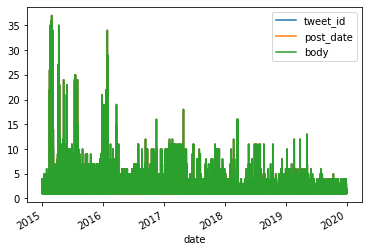

In [26]:
tweets_cleaned.groupby("date").agg("count").plot()

In [28]:
tweets_cleaned.head()

,tweet_id,post_date,body,date
0,550441509175443456,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",2014-12-31 19:00:57
1,550441672312512512,1420070496,Insanity of today weirdo massive selling. $aap...,2014-12-31 19:01:36
2,550441732014223360,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,2014-12-31 19:01:50
3,550442977802207232,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,2014-12-31 19:06:47
4,550443807834402816,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,2014-12-31 19:10:05


In [33]:
len(tweets_cleaned)

3717964

In [36]:
bigboy = pd.merge(tweets_cleaned, companies, on="tweet_id")
bigboy = bigboy[["date", "ticker_symbol", "body"]]
bigboy.rename(columns={"body":"text","ticker_symbol":"ticker"}, inplace=True)
bigboy.head()

,date,ticker,text
0,2014-12-31 19:00:57,AAPL,"lx21 made $10,008 on $AAPL -Check it out! htt..."
1,2014-12-31 19:01:36,AAPL,Insanity of today weirdo massive selling. $aap...
2,2014-12-31 19:01:50,AMZN,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...
3,2014-12-31 19:06:47,TSLA,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...
4,2014-12-31 19:10:05,AAPL,Swing Trading: Up To 8.91% Return In 14 Days h...


In [40]:
combined = pd.read_csv("/Users/kelseyesposito/finBERT/data/sentiment_data/combined_data.csv")[["date", "ticker", "text"]]
combined.head()

,date,ticker,text
0,2018-07-18 21:33:26+00:00,GS,VIDEO: “I was in my office. I was minding my o...
1,2018-07-18 22:22:47+00:00,M,The price of lumber $LB_F is down 22% since hi...
2,2018-07-18 22:32:01+00:00,AIG,Who says the American Dream is dead? https://t...
3,2018-07-18 22:52:52+00:00,BTC,Barry Silbert is extremely optimistic on bitco...
4,2018-07-18 23:00:01+00:00,ORCL,How satellites avoid attacks and space junk wh...


In [71]:
super_combined = combined.append(bigboy)
super_combined.reset_index(drop=True, inplace=True)
super_combined.head()

,date,ticker,text
0,2018-07-18 21:33:26+00:00,GS,VIDEO: “I was in my office. I was minding my o...
1,2018-07-18 22:22:47+00:00,M,The price of lumber $LB_F is down 22% since hi...
2,2018-07-18 22:32:01+00:00,AIG,Who says the American Dream is dead? https://t...
3,2018-07-18 22:52:52+00:00,BTC,Barry Silbert is extremely optimistic on bitco...
4,2018-07-18 23:00:01+00:00,ORCL,How satellites avoid attacks and space junk wh...


In [72]:
super_combined["date1"] = pd.to_datetime(super_combined["date"])

In [73]:
super_combined["date2"] = super_combined["date1"].dt.strftime('%m-%d-%Y')

In [74]:
super_combined.head()

,date,ticker,text,date1,date2
0,2018-07-18 21:33:26+00:00,GS,VIDEO: “I was in my office. I was minding my o...,2018-07-18 21:33:26+00:00,07-18-2018
1,2018-07-18 22:22:47+00:00,M,The price of lumber $LB_F is down 22% since hi...,2018-07-18 22:22:47+00:00,07-18-2018
2,2018-07-18 22:32:01+00:00,AIG,Who says the American Dream is dead? https://t...,2018-07-18 22:32:01+00:00,07-18-2018
3,2018-07-18 22:52:52+00:00,BTC,Barry Silbert is extremely optimistic on bitco...,2018-07-18 22:52:52+00:00,07-18-2018
4,2018-07-18 23:00:01+00:00,ORCL,How satellites avoid attacks and space junk wh...,2018-07-18 23:00:01+00:00,07-18-2018


In [75]:
super_combined = super_combined[["date2","ticker","text"]]
super_combined.sort_values(by="date2", inplace=True)
super_combined.reset_index(drop=True, inplace=True)
super_combined.rename(columns={"date2":"date"}, inplace=True)
super_combined["date"] = pd.to_datetime(super_combined["date"])
super_combined.head()

,date,ticker,text
0,2014-01-01,T,HAPPY NEW YEARS TO MY N$T SQUAD @AhColdKelo @b...
1,2014-01-01,HD,Dow #Stocks Trend $AXP $UTX $CSCO $KO $HD $DIS...
2,2014-01-01,HD,$HD Analysis Scarred U.S. consumers a hard sel...
3,2014-01-01,BAC,$BAC - Eleven companies that had a great run i...
4,2014-01-01,GOOG,"$GOOG Removing Edits in a Document, and Minimi..."


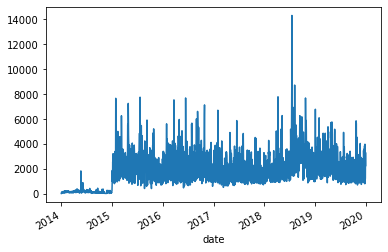

In [79]:
super_combined.groupby("date").agg("count")["text"].plot();

## Haig Data

In [83]:
# import 2big4git
toobig = pd.read_csv("/Users/kelseyesposito/finBERT/data/sentiment_data/2Big4Git.csv")
toobig = toobig[["date", "ticker", "text"]]
toobig.head()

,date,ticker,text
0,2021-02-10,KO,$KO investing more for long-term and dividend....
1,2021-02-10,KO,$KO Don&#39;t worry guys!! Restaurants pubs an...
2,2021-02-10,KO,$KO joke. Welp will be adding more lower
3,2021-02-10,FTEK,$FTEK truly a diamond in the rough
4,2021-02-10,FTEK,$FTEK upgrade to buy yesterday should help. Le...


In [85]:
#dattocsv (drive)
dtce = pd.read_csv("/Users/kelseyesposito/finBERT/data/sentiment_data/datToCsvEmail.csv")
dtce = dtce[["date","ticker","text"]]
dtce.head()

,date,ticker,text
0,2021-01-08,KO,"$KO love this ticker!! My dividend baby, addin..."
1,2021-01-08,KO,"$KO High watch. Let see where this goes, but t..."
2,2021-01-08,KO,$KO they are downgrading because they want in ...
3,2021-01-08,KO,$KO these will be a major hit! Cant wait! http...
4,2021-01-08,KO,"$KO Just thinking, when marijuana is legalized..."


In [90]:
# smolboy
smol = pd.read_csv("/Users/kelseyesposito/finBERT/data/sentiment_data/smolBoiData.csv")
smol = smol[["created_at", "ticker", "text"]]
smol["created_at"] = pd.to_datetime(smol["created_at"])
smol["date"] = smol["created_at"].dt.strftime('%m-%d-%Y')
smol['date'] = pd.to_datetime(smol["date"])
smol = smol[["date","ticker","text"]]
smol.head()

,date,ticker,text
0,2020-07-09,AMD,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...
1,2020-04-27,UPS,RT @PipsToDollars: Earnings $AMZN $TSLA $MSFT ...
2,2020-06-06,CRM,How will the future fly for Spirit Air $SAVE ?...
3,2020-07-01,TSLA,Chile: On The Road to Recovery in 2021? https:...
4,2020-04-15,DIS,@EpiphronR China Population 1.3 Billion Reaso...


In [96]:
# project 6500
proj6500 = pd.read_csv("/Users/kelseyesposito/finBERT/data/sentiment_data/Project6500.csv", encoding="unicode_escape")
proj6500["datetime"] = pd.to_datetime(proj6500["datetime"])
proj6500["date"] = proj6500["datetime"].dt.strftime('%m-%d-%Y')
proj6500 = proj6500[["date","ticker","headline"]]
proj6500.rename(columns={"headline":"text"}, inplace=True)
proj6500.head()

,date,ticker,text
0,01-16-2020,MMM,$MMM fell on hard times but could be set to re...
1,01-11-2020,MMM,Wolfe Research Upgrades 3M $MMM to ¡§Peer Perf...
2,01-09-2020,MMM,3M $MMM Upgraded to ¡§Peer Perform¡¨ by Wolfe ...
3,01-08-2020,MMM,$MMM #insideday follow up as it also opened up...
4,01-08-2020,MMM,$MMM is best #dividend #stock out there and do...


In [100]:
# dattocsv
dtc = pd.read_csv("/Users/kelseyesposito/finBERT/data/sentiment_data/datToCsv.csv")
dtc["date"] = pd.to_datetime(dtc["date"])
dtc = dtc[["date","ticker","text"]]
dtc.head()

,date,ticker,text
0,2020-11-12,NOC,$NOC phase 3 data moderna!
1,2020-11-12,NOC,$NOC cheap buying more
2,2020-11-12,NOC,$NOC bought.
3,2020-11-12,NOC,$NOC sold it market coming down
4,2020-11-12,NMIH,How will this affect the market? $NMIH enters ...


In [103]:
# 2bigforgitoremail
tbfgoe = pd.read_csv("/Users/kelseyesposito/finBERT/data/sentiment_data/2Big4GitOrEmail.csv")
tbfgoe["date"] = pd.to_datetime(tbfgoe["date"])
tbfgoe = tbfgoe[["date","ticker","text"]]
tbfgoe.head()

,date,ticker,text
0,2020-12-07,CDXS,How will this affect the market? $CDXS MACD Hi...
1,2020-12-07,CDXS,"If youre trading this week, Read This! $CDXS R..."
2,2020-12-07,WEC,$WEC Midwest weather above average. Cold snap...
3,2020-12-07,XOMA,Dont miss out on this! $XOMA RSI Indicator lef...
4,2020-12-07,RARE,$RARE x2.6 profit factor ULTRAGENYX PHARMACEUT...


## Make super table with bigboy and super combined

In [111]:
biggestboi = super_combined.append(toobig)
print(len(biggestboi))
biggestboi.head()

4766191


,date,ticker,text
0,2014-01-01 00:00:00,T,HAPPY NEW YEARS TO MY N$T SQUAD @AhColdKelo @b...
1,2014-01-01 00:00:00,HD,Dow #Stocks Trend $AXP $UTX $CSCO $KO $HD $DIS...
2,2014-01-01 00:00:00,HD,$HD Analysis Scarred U.S. consumers a hard sel...
3,2014-01-01 00:00:00,BAC,$BAC - Eleven companies that had a great run i...
4,2014-01-01 00:00:00,GOOG,"$GOOG Removing Edits in a Document, and Minimi..."


In [112]:
biggestboi = biggestboi.append(dtce)
print(len(biggestboi))
biggestboi.head()

4923734


,date,ticker,text
0,2014-01-01 00:00:00,T,HAPPY NEW YEARS TO MY N$T SQUAD @AhColdKelo @b...
1,2014-01-01 00:00:00,HD,Dow #Stocks Trend $AXP $UTX $CSCO $KO $HD $DIS...
2,2014-01-01 00:00:00,HD,$HD Analysis Scarred U.S. consumers a hard sel...
3,2014-01-01 00:00:00,BAC,$BAC - Eleven companies that had a great run i...
4,2014-01-01 00:00:00,GOOG,"$GOOG Removing Edits in a Document, and Minimi..."


In [113]:
biggestboi = biggestboi.append(smol)
print(len(biggestboi))
biggestboi.head()

4925623


,date,ticker,text
0,2014-01-01 00:00:00,T,HAPPY NEW YEARS TO MY N$T SQUAD @AhColdKelo @b...
1,2014-01-01 00:00:00,HD,Dow #Stocks Trend $AXP $UTX $CSCO $KO $HD $DIS...
2,2014-01-01 00:00:00,HD,$HD Analysis Scarred U.S. consumers a hard sel...
3,2014-01-01 00:00:00,BAC,$BAC - Eleven companies that had a great run i...
4,2014-01-01 00:00:00,GOOG,"$GOOG Removing Edits in a Document, and Minimi..."


In [114]:
biggestboi = biggestboi.append(proj6500)
print(len(biggestboi))
biggestboi.head()

4935093


,date,ticker,text
0,2014-01-01 00:00:00,T,HAPPY NEW YEARS TO MY N$T SQUAD @AhColdKelo @b...
1,2014-01-01 00:00:00,HD,Dow #Stocks Trend $AXP $UTX $CSCO $KO $HD $DIS...
2,2014-01-01 00:00:00,HD,$HD Analysis Scarred U.S. consumers a hard sel...
3,2014-01-01 00:00:00,BAC,$BAC - Eleven companies that had a great run i...
4,2014-01-01 00:00:00,GOOG,"$GOOG Removing Edits in a Document, and Minimi..."


In [115]:
biggestboi = biggestboi.append(dtc)
print(len(biggestboi))
biggestboi.head()

4976848


,date,ticker,text
0,2014-01-01 00:00:00,T,HAPPY NEW YEARS TO MY N$T SQUAD @AhColdKelo @b...
1,2014-01-01 00:00:00,HD,Dow #Stocks Trend $AXP $UTX $CSCO $KO $HD $DIS...
2,2014-01-01 00:00:00,HD,$HD Analysis Scarred U.S. consumers a hard sel...
3,2014-01-01 00:00:00,BAC,$BAC - Eleven companies that had a great run i...
4,2014-01-01 00:00:00,GOOG,"$GOOG Removing Edits in a Document, and Minimi..."


In [116]:
biggestboi = biggestboi.append(tbfgoe)
print(len(biggestboi))
biggestboi.head()

5073650


,date,ticker,text
0,2014-01-01 00:00:00,T,HAPPY NEW YEARS TO MY N$T SQUAD @AhColdKelo @b...
1,2014-01-01 00:00:00,HD,Dow #Stocks Trend $AXP $UTX $CSCO $KO $HD $DIS...
2,2014-01-01 00:00:00,HD,$HD Analysis Scarred U.S. consumers a hard sel...
3,2014-01-01 00:00:00,BAC,$BAC - Eleven companies that had a great run i...
4,2014-01-01 00:00:00,GOOG,"$GOOG Removing Edits in a Document, and Minimi..."


In [118]:
biggestboi["date"] = pd.to_datetime(biggestboi["date"])
biggestboi["date"] = biggestboi["date"].dt.strftime('%m-%d-%Y')

In [124]:
biggestboi.to_csv("/Users/kelseyesposito/finBERT/data/sentiment_data/biggestboi.csv")